## 12 Pandas - Final Exercise

Plot the top 5 trending skills for Data Analysts over every month in 2023. 

In [ ]:
# Importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Clean data
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

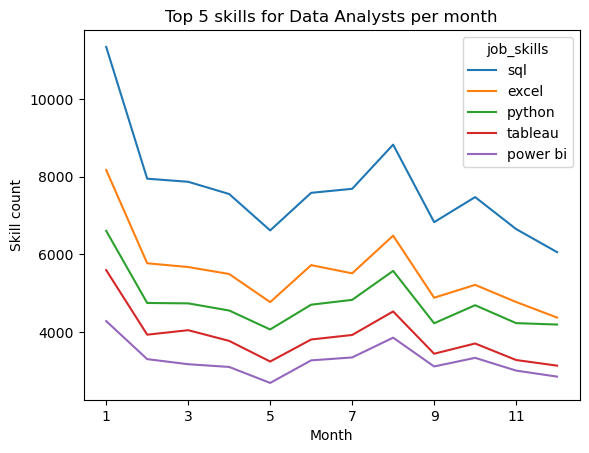

In [22]:
# create a df with only Data analyst jobs

df_DA = df[df["job_title_short"] == "Data Analyst"].copy()

# create a new month column

df_DA["job_posted_month_no"] = df_DA["job_posted_date"].dt.month

# new df with exploded skills

df_DA_explode = df_DA.explode("job_skills")

# we now need to pivot to get the counts per month and skill

df_DA_pivot = df_DA_explode.pivot_table(
    index="job_posted_month_no",
    columns="job_skills",
    aggfunc="size",
    fill_value=0 # to have 0 instead of NaN values. NaN values wouldn't be showing on a plot
)

# but we currently have way too many skills to have a legible plot
# let's create a new total row in our pivot to identify the top X most popular ones.
df_DA_pivot.loc["Total"] = df_DA_pivot.sum()

# We can then sort by this total rows.

df_DA_pivot = df_DA_pivot[df_DA_pivot.loc["Total"].sort_values(ascending=False).index]

# let's drop the total row now that we have it sorted in the order we want!

df_DA_pivot = df_DA_pivot.drop("Total")

# let's plot

df_DA_pivot.iloc[:, :5].plot(kind="line")
plt.title("Top 5 skills for Data Analysts per month")
plt.xlabel("Month")
plt.ylabel("Skill count")
plt.show()